<a href="https://colab.research.google.com/github/isi1993/DRRR/blob/main/my_Retail_dataset_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#load the required python library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# load the Transaction file path

In [ ]:
Transaction_Data = pd.read_excel("/content/QVI_transaction_data (2).xlsx")
Transaction_Data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


# checking for the various columns information

In [ ]:
# Check the data types of the columns
Transaction_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


# check for null values

In [ ]:
Transaction_Data.isnull().sum()

,0
DATE,0
STORE_NBR,0
LYLTY_CARD_NBR,0
TXN_ID,0
PROD_NBR,0
PROD_NAME,0
PROD_QTY,0
TOT_SALES,0


# change the column name

In [ ]:
Transaction_Data = Transaction_Data.rename(columns={'TXN_ID': 'TAX_ID', 'PROD_NAME': 'PRODUCT_NAME', 'TOT_SALES': 'TOTAL_SALES', 'STORE_NBR': 'STORE_NUMBER',
                                                    'PROD_QTY': 'QUANTITY', 'LYLTY_CARD_NBR': 'CARD_NUMBER', 'PROD_NBR': 'PRODUCT_NUMBER'})

# checking for the various columns information

In [ ]:
Transaction_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NUMBER    264836 non-null  int64  
 2   CARD_NUMBER     264836 non-null  int64  
 3   TAX_ID          264836 non-null  int64  
 4   PRODUCT_NUMBER  264836 non-null  int64  
 5   PRODUCT_NAME    264836 non-null  object 
 6   QUANTITY        264836 non-null  int64  
 7   TOTAL_SALES     264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


# converting the numeric date columns into datetime

In [ ]:
#convert the date column from numeric to datetime
Transaction_Data['DATE'] = pd.to_datetime(Transaction_Data['DATE'], unit='D', origin='1899-12-30')
Transaction_Data

,DATE,STORE_NUMBER,CARD_NUMBER,TAX_ID,PRODUCT_NUMBER,PRODUCT_NAME,QUANTITY,TOTAL_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


# examing the PRODUCT_NAME columns

In [ ]:

Transaction_Data['PRODUCT_NAME'].value_counts()


,count
PRODUCT_NAME,
Kettle Mozzarella Basil & Pesto 175g,3304
Kettle Tortilla ChpsHny&Jlpno Chili 150g,3296
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g,3269
Tyrrells Crisps Ched & Chives 165g,3268
Cobs Popd Sea Salt Chips 110g,3265
...,...
RRD Pc Sea Salt 165g,1431
Woolworths Medium Salsa 300g,1430
NCC Sour Cream & Garden Chives 175g,1419


## checking for unique product_name

In [ ]:
unique_products = Transaction_Data["PRODUCT_NAME"].unique()
unique_products

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'K

# removing all special characters from the product_name columns

In [ ]:
#Removing special characters Let's look at the most common words by counting the number of times a word appears

#### and sorting them by this frequency in order of highest to lowest frequency
PRODUCT_NAME = Transaction_Data['PRODUCT_NAME'].astype(str)
all_words = (
       PRODUCT_NAME
     .str.lower()
     .str.replace(r"[^a-z0-9\s]", "", regex=True)
     .str.split()
     .explode()
)
word_counts = all_words.value_counts().reset_index()
word_counts.columns =["Word", "Frequency"]
#freq_dict = word_counts.set_index('Word')
print("\nTop 20 most common words in PROD_NAME:")
print(word_counts.head(20))


Top 20 most common words in PROD_NAME:
        Word  Frequency
0       175g      60561
1      chips      49770
2       150g      43131
3     kettle      41288
4     smiths      28860
5       salt      27976
6     cheese      27890
7       134g      25102
8   pringles      25102
9    doritos      24962
10   crinkle      23960
11      110g      22387
12      corn      22063
13  original      21560
14       cut      20754
15      chip      18645
16      170g      18502
17     salsa      18094
18   chicken      15407
19      165g      15297


# check for  data types

In [ ]:
Transaction_Data.dtypes

,0
DATE,datetime64[ns]
STORE_NUMBER,int64
CARD_NUMBER,int64
TAX_ID,int64
PRODUCT_NUMBER,int64
PRODUCT_NAME,object
QUANTITY,int64
TOTAL_SALES,float64


# cheack for duplicates entry

In [ ]:
Transaction_Data.duplicated().sum()

np.int64(1)

# drop duplicated entry

In [ ]:
Transaction_Data.drop_duplicates(inplace=True)

# check for number of customers by card number

In [ ]:
Transaction_Data['CARD_NUMBER'].nunique()

72637

# cheack for unique product name

In [ ]:
Transaction_Data['PRODUCT_NAME'].nunique()

114

# check for number of store in  the dataset

In [ ]:
Transaction_Data['STORE_NUMBER'].nunique()

272

create a new column called pack size by extracting digit from Product_name **column**

In [ ]:

Transaction_Data['PACK_SIZE'] = Transaction_Data['PRODUCT_NAME'].str.extract(r'(\d+)').astype(float)

# Quick check
print(Transaction_Data.head())

        DATE  STORE_NUMBER  CARD_NUMBER  TAX_ID  PRODUCT_NUMBER  \
0 2018-10-17             1         1000       1               5   
1 2019-05-14             1         1307     348              66   
2 2019-05-20             1         1343     383              61   
3 2018-08-17             2         2373     974              69   
4 2018-08-18             2         2426    1038             108   

                               PRODUCT_NAME  QUANTITY  TOTAL_SALES  PACK_SIZE  
0    Natural Chip        Compny SeaSalt175g         2          6.0      175.0  
1                  CCs Nacho Cheese    175g         3          6.3      175.0  
2    Smiths Crinkle Cut  Chips Chicken 170g         2          2.9      170.0  
3    Smiths Chip Thinly  S/Cream&Onion 175g         5         15.0      175.0  
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         3         13.8      150.0  


CREATE A COLUMN FOR BRAND NAME

In [ ]:

Transaction_Data["BRAND"] = Transaction_Data["PRODUCT_NAME"].str.split().str[0]

print(Transaction_Data[["PRODUCT_NAME", "BRAND"]].head())

                               PRODUCT_NAME    BRAND
0    Natural Chip        Compny SeaSalt175g  Natural
1                  CCs Nacho Cheese    175g      CCs
2    Smiths Crinkle Cut  Chips Chicken 170g   Smiths
3    Smiths Chip Thinly  S/Cream&Onion 175g   Smiths
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g   Kettle


# graphic representation of various pack sizes bought over **time**

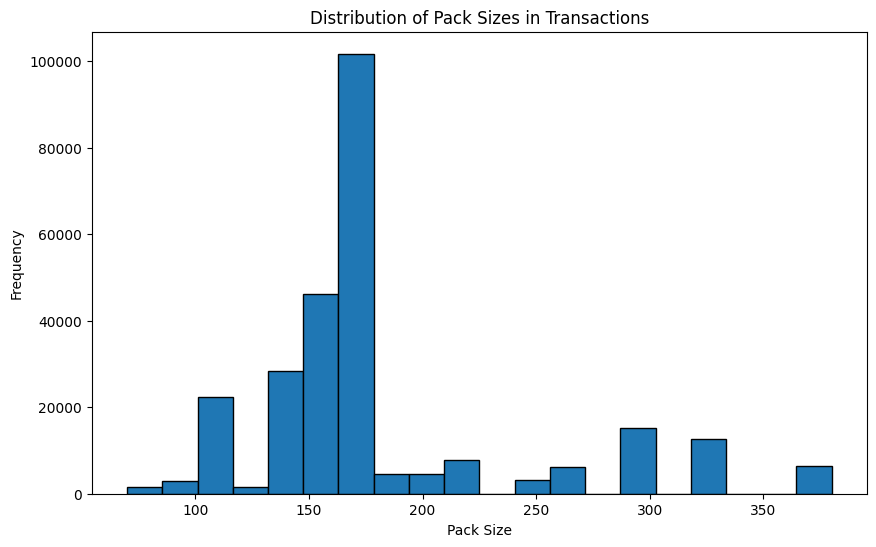

In [ ]:
#Histogram Showing The Various Pack Sizes Bought Over Time
plt.figure(figsize=(10,6))
plt.hist(Transaction_Data["PACK_SIZE"], bins=20, edgecolor="black")
plt.xlabel("Pack Size")
plt.ylabel("Frequency")
plt.title("Distribution of Pack Sizes in Transactions")
plt.show()

# cheack for value count for various pack sizes

In [ ]:
Transaction_Data['PACK_SIZE'].value_counts()

,count
PACK_SIZE,
175.0,66389
150.0,43131
134.0,25102
110.0,22387
170.0,19983
165.0,15297
300.0,15166
330.0,12540
380.0,6418


In [ ]:
Transaction_Data['BRAND'].value_counts()

,count
BRAND,
Kettle,41288
Smiths,28859
Pringles,25102
Doritos,24962
Thins,14075
RRD,11894
Infuzions,11057
WW,10320
Cobs,9693


# check for unique Brand name

In [ ]:
Transaction_Data['BRAND'].unique()

array(['Natural', 'CCs', 'Smiths', 'Kettle', 'Old', 'Grain', 'Doritos',
       'Twisties', 'WW', 'Thins', 'Burger', 'NCC', 'Cheezels', 'Infzns',
       'Red', 'Pringles', 'Dorito', 'Infuzions', 'Smith', 'GrnWves',
       'Tyrrells', 'Cobs', 'Woolworths', 'French', 'RRD', 'Tostitos',
       'Cheetos', 'Snbts', 'Sunbites'], dtype=object)

# Rename most wrong entries in the Brand columns

In [ ]:
# Define a mapping dictionary for brand replacements
Correct_Brand = {
    "RRD": "RED",
    "SUNBITES": "SNBTS",
    "INFZNS": "INFUZIONS",
    "WW": "WOOLWORTHS",
    "SMITH": "SMITHS",
    "NCC": "NATURAL",
    "DORITOS": "DORITO",
   "GRAIN": "GRNWVES"
}

# Standardize brand column: convert to uppercase first for consistency
Transaction_Data["BRAND"] = Transaction_Data["BRAND"].str.upper()



# Replace based on mapping (all variations collapse into umbrella brand)
Transaction_Data["BRAND"] = Transaction_Data["BRAND"].replace(Correct_Brand)

# Aggregate brand counts under the umbrella names
brand_summary = Transaction_Data["BRAND"].value_counts().reset_index()
brand_summary.columns = ["BRAND", "count"]

print(brand_summary)
#brand_transaction_counts = Transaction_Data_no_salsa.groupby("Corrected Brand").size().reset_index(name="Transaction Count")

#print(brand_transaction_counts)

         BRAND  count
0       KETTLE  41288
1       SMITHS  31822
2       DORITO  28147
3     PRINGLES  25102
4          RED  17779
5   WOOLWORTHS  14757
6    INFUZIONS  14201
7        THINS  14075
8         COBS   9693
9     TOSTITOS   9471
10    TWISTIES   9454
11         OLD   9324
12     GRNWVES   7740
13     NATURAL   7469
14    TYRRELLS   6442
15    CHEEZELS   4603
16         CCS   4551
17       SNBTS   3008
18     CHEETOS   2927
19      BURGER   1564
20      FRENCH   1418


In [ ]:
Transaction_Data.head()

,DATE,STORE_NUMBER,CARD_NUMBER,TAX_ID,PRODUCT_NUMBER,PRODUCT_NAME,QUANTITY,TOTAL_SALES,PACK_SIZE,BRAND
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175.0,NATURAL
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175.0,CCS
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170.0,SMITHS
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175.0,SMITHS
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150.0,KETTLE


# cheacking for sale analysis across the one year period

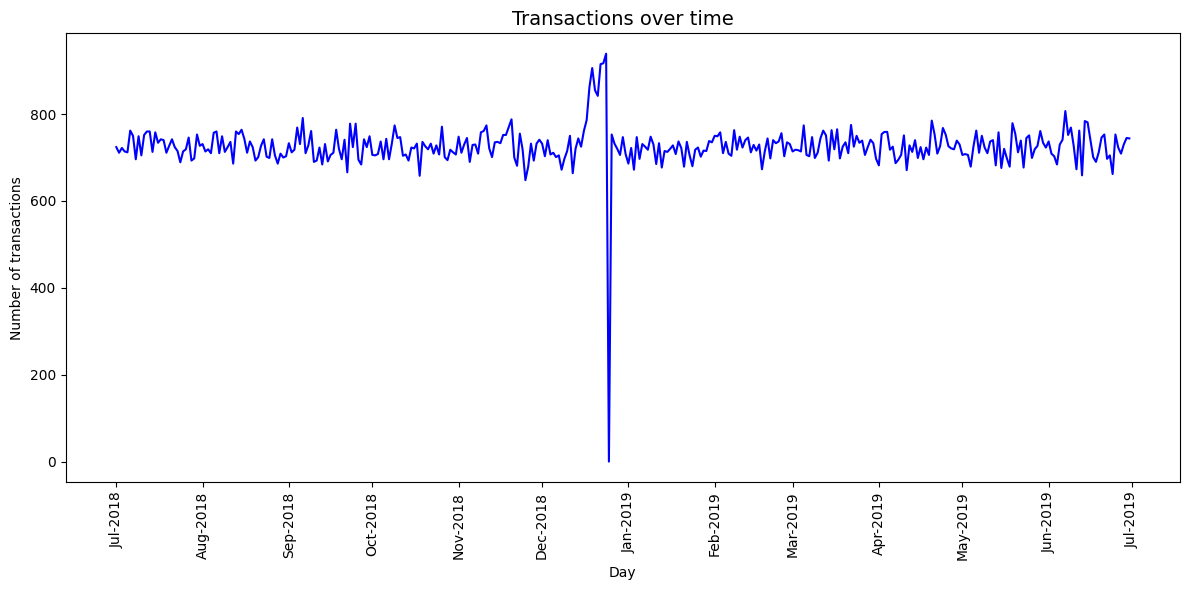

In [ ]:
# 2. Create a full sequence of dates
all_dates = pd.DataFrame({
    "DATE": pd.date_range(start="2018-07-01", end="2019-06-30", freq="D")
})

# 3. Count transactions per day
transactions_by_day = Transaction_Data.groupby("DATE").size().reset_index(name="N")

# 4. Left join all_dates with transactions_by_day
transactions_by_day = all_dates.merge(transactions_by_day, on="DATE", how="left")

# 5. Fill missing counts with 0
transactions_by_day["N"] = transactions_by_day["N"].fillna(0)

# 6. Plot transactions over time
plt.figure(figsize=(12,6))
plt.plot(transactions_by_day["DATE"], transactions_by_day["N"], color="blue")

plt.title("Transactions over time", fontsize=14, ha="center")
plt.xlabel("Day")
plt.ylabel("Number of transactions")

# Format x-axis: monthly ticks
plt.xticks(rotation=90)
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator())
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter("%b-%Y"))

plt.tight_layout()
plt.show()

# cheack for sale analysis for only december

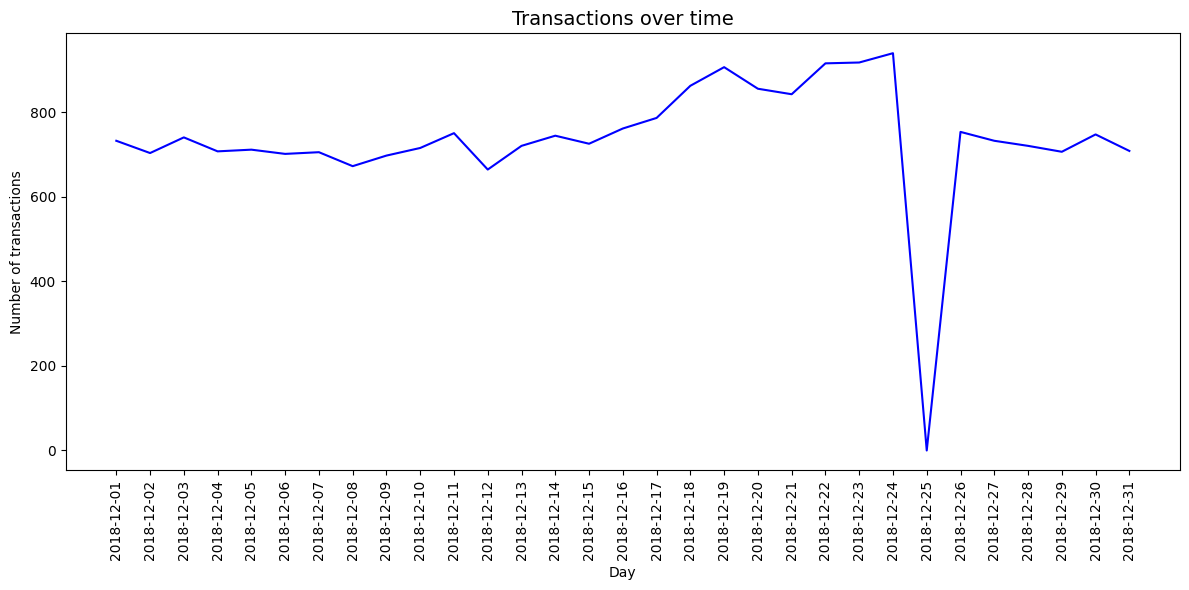

In [ ]:
# 1. Filter transactions to December only
december_data = transactions_by_day[transactions_by_day["DATE"].dt.month == 12]

# 2. Plot line graph
plt.figure(figsize=(12,6))
plt.plot(december_data["DATE"], december_data["N"], color="blue")

# 3. Labels and title
plt.title("Transactions over time", fontsize=14, ha="center")
plt.xlabel("Day")
plt.ylabel("Number of transactions")

# 4. Show every day on x-axis
plt.xticks(december_data["DATE"], rotation=90)

plt.tight_layout()
plt.show()

In [ ]:
Transaction_Data.columns

Index(['DATE', 'STORE_NUMBER', 'CARD_NUMBER', 'TAX_ID', 'PRODUCT_NUMBER',
       'PRODUCT_NAME', 'QUANTITY', 'TOTAL_SALES', 'PACK_SIZE', 'BRAND'],
      dtype='object')

# cheacking for the brand with the highest sales

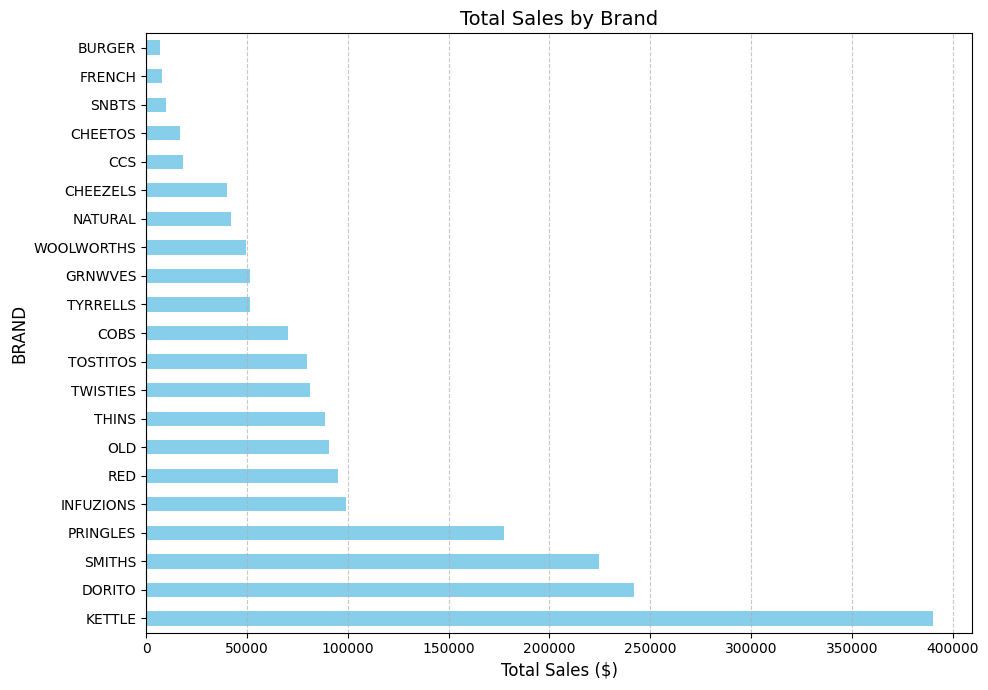

In [ ]:
# Calculate total sales by brand
total_sales_by_brand = Transaction_Data.groupby('BRAND')['TOTAL_SALES'].sum().sort_values(ascending=False)

# --- Plot the Bar Chart ---
plt.figure(figsize=(10, 7)) # Increased figure size for better readability
total_sales_by_brand.plot(kind='barh', color='skyblue') # Use plot method for pandas Series

# --- Customize the chart ---
plt.title('Total Sales by Brand', fontsize=14)
plt.xlabel('Total Sales ($)', fontsize=12)
plt.ylabel('BRAND', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7) # Changed grid to x-axis for horizontal bar chart

# Show the chart
plt.tight_layout()
plt.show()

# calculate the average price per pack by brand

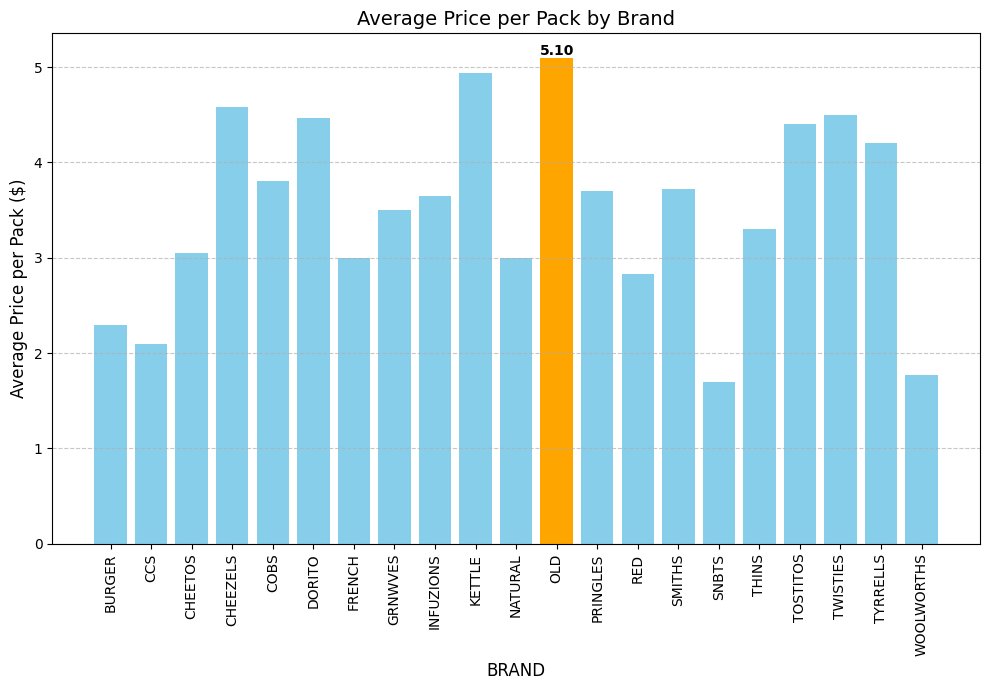

In [ ]:

average_price_by_brand = Transaction_Data.groupby('BRAND')['TOTAL_SALES'].sum() / Transaction_Data.groupby('BRAND')['QUANTITY'].sum()


max_brand = average_price_by_brand.idxmax()

plt.figure(figsize=(10, 7))

colors = ['orange' if brand == max_brand else 'skyblue' for brand in average_price_by_brand.index]
plt.bar(average_price_by_brand.index, average_price_by_brand.values, color=colors)

plt.title('Average Price per Pack by Brand', fontsize=14)
plt.xlabel('BRAND', fontsize=12)
plt.ylabel('Average Price per Pack ($)', fontsize=12)

highest_value = average_price_by_brand.max()
plt.text(max_brand, highest_value,
         f'{highest_value:.2f}', ha='center', va='bottom', fontsize=10, fontweight='bold')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
Transaction_Data.columns

Index(['DATE', 'STORE_NUMBER', 'CARD_NUMBER', 'TAX_ID', 'PRODUCT_NUMBER',
       'PRODUCT_NAME', 'QUANTITY', 'TOTAL_SALES', 'PACK_SIZE', 'BRAND'],
      dtype='object')

# cheacking for store with the highest sale value

In [ ]:
STORE =  Transaction_Data.groupby('STORE_NUMBER')['TOTAL_SALES'].sum().sort_values(ascending=False)
STORE.head(20)

,TOTAL_SALES
STORE_NUMBER,
226,18905.45
88,16333.25
165,15973.75
40,15559.50
237,15539.50
58,15251.45
199,14797.00
4,14647.65
203,14551.60


In [ ]:
Transaction_Data['QUANTITY'].value_counts()

,count
QUANTITY,
2,236038
1,27518
5,450
3,430
4,397
200,2


# load the customer behaviour filepath

In [ ]:
Customer_Data = pd.read_csv("/content/QVI_purchase_behaviour.csv")
Customer_Data

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


In [ ]:
Customer_Data.columns

Index(['LYLTY_CARD_NBR', 'LIFESTAGE', 'PREMIUM_CUSTOMER'], dtype='object')

RENAME THE COLUMN

In [ ]:
Customer_Data.rename(columns={'LYLTY_CARD_NBR': 'CARD_NUMBER'}, inplace=True)

In [ ]:
Customer_Data.columns

Index(['CARD_NUMBER', 'LIFESTAGE', 'PREMIUM_CUSTOMER'], dtype='object')

# summary of the customer data

In [ ]:
Customer_Data.describe()

,CARD_NUMBER
count,7.263700e+04
mean,1.361859e+05
std,8.989293e+04
min,1.000000e+03
25%,6.620200e+04
50%,1.340400e+05
75%,2.033750e+05
max,2.373711e+06


In [ ]:
Customer_Data.columns

Index(['CARD_NUMBER', 'LIFESTAGE', 'PREMIUM_CUSTOMER'], dtype='object')

# merging both dataset

In [ ]:

merged_Data = pd.merge(
    Transaction_Data,
    Customer_Data,
    how='left',
    on='CARD_NUMBER'
)
for col in merged_Data.columns:
    if merged_Data[col].dtype == 'object':
        merged_Data[col] = merged_Data[col].fillna("Unknown")
    else:
        merged_Data[col] = merged_Data[col].fillna(0)

print("Number of rows in merged_Data dataset:", len(merged_Data))
print("Number of rows in Transaction_Data:", len(Transaction_Data))
print("Number of rows in Customer_Data:", len(Customer_Data))

Number of rows in merged_Data dataset: 264835
Number of rows in Transaction_Data: 264835
Number of rows in Customer_Data: 72637


In [ ]:
merged_Data.head()

,DATE,STORE_NUMBER,CARD_NUMBER,TAX_ID,PRODUCT_NUMBER,PRODUCT_NAME,QUANTITY,TOTAL_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175.0,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175.0,CCS,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170.0,SMITHS,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175.0,SMITHS,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150.0,KETTLE,MIDAGE SINGLES/COUPLES,Budget


# I cheack for how frequent customer makes purchases by their card number

In [ ]:
# --- Calculate purchase frequency per customer ---
purchase_frequency = merged_Data['CARD_NUMBER'].value_counts().reset_index()

# Rename columns for clarity
purchase_frequency.columns = ['CARD_NUMBER', 'Purchase_Count']

In [ ]:
purchase_frequency.head(20)

,CARD_NUMBER,Purchase_Count
0,172032,18
1,162039,18
2,128178,17
3,13138,17
4,116181,17
5,230078,17
6,213140,16
7,222242,16
8,104117,16
9,94185,16


In [ ]:
! pip install squarify

# checking for proportion of sales across both lifestage and premium

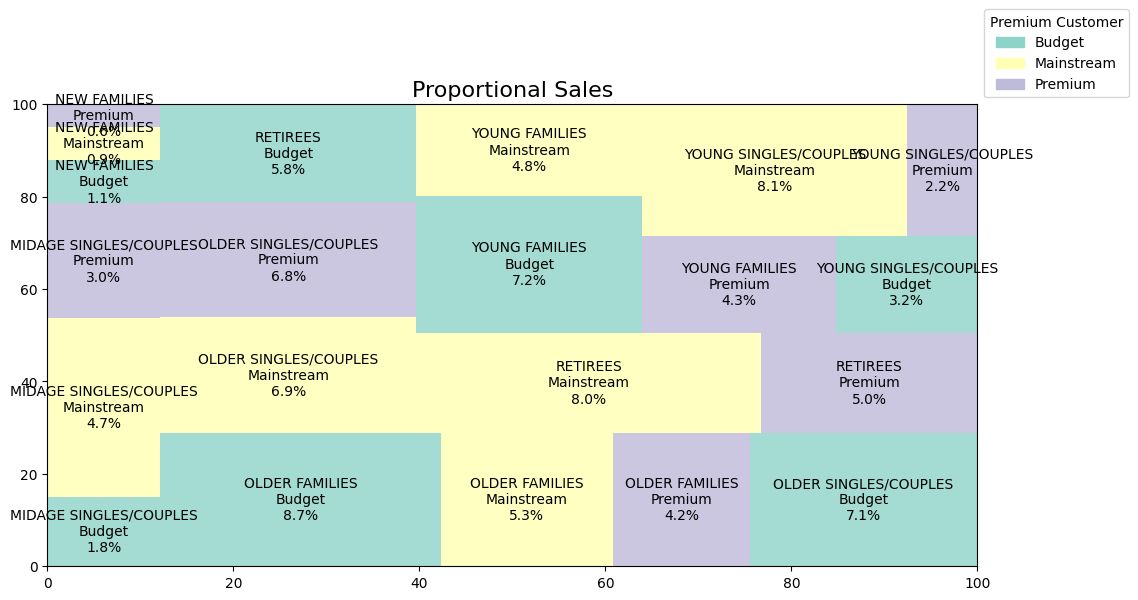

In [ ]:
import squarify

# ---- Step 1: Aggregate sales ----
sales = (
    merged_Data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'], as_index=False)
        .agg(SALES=('TOTAL_SALES', 'sum'))
)

# ---- Step 2: Compute proportions ----
total_sales = sales['SALES'].sum()
sales['PCT'] = (sales['SALES'] / total_sales * 100).round(1)

# ---- Step 3: Define colors for Premium Customer ----
premium_categories = sales['PREMIUM_CUSTOMER'].unique()
color_map = dict(zip(premium_categories, plt.cm.Set3.colors[:len(premium_categories)]))
sales['color'] = sales['PREMIUM_CUSTOMER'].map(color_map)

# ---- Step 4: Create labels ----
sales['label'] = sales.apply(
    lambda x: f"{x['LIFESTAGE']}\n{x['PREMIUM_CUSTOMER']}\n{x['PCT']}%",
    axis=1
)

# ---- Step 5: Plot Squarify Treemap ----
plt.figure(figsize=(12, 6))
squarify.plot(
    sizes=sales['SALES'],
    label=sales['label'],
    color=sales['color'],
    alpha=0.8
)

plt.title("Proportional Sales", fontsize=16)

# ---- Step 6: Add legend for Premium Customer ----
handles = [plt.Rectangle((0,0),1,1, color=color_map[cat]) for cat in premium_categories]
plt.legend(handles, premium_categories, title='Premium Customer', bbox_to_anchor=(1, 1))

plt.axis('on')  # remove axes for treemap
plt.show()

In [ ]:
merged_Data.columns

Index(['DATE', 'STORE_NUMBER', 'CARD_NUMBER', 'TAX_ID', 'PRODUCT_NUMBER',
       'PRODUCT_NAME', 'QUANTITY', 'TOTAL_SALES', 'PACK_SIZE', 'BRAND',
       'LIFESTAGE', 'PREMIUM_CUSTOMER'],
      dtype='object')

CALCULATE AVERAGE SPENDING PER SEGMENT AND SPENDIND HABITS

In [ ]:
# --- 1️⃣ Calculate average and total spending per segment ---
segment_spending = merged_Data.groupby('PREMIUM_CUSTOMER')['TOTAL_SALES'].agg(
    Avg_Spending='mean',
    Total_Spending='sum',
    Transactions='count'
).reset_index()

# --- 2️⃣ Calculate spending habit metrics ---
segment_spending['% of Total Sales'] = (
    segment_spending['Total_Spending'] / segment_spending['Total_Spending'].sum() * 100
).round(2)

print("💰 Spending summary per customer segment:")
print(segment_spending)

💰 Spending summary per customer segment:
  PREMIUM_CUSTOMER  Avg_Spending  Total_Spending  Transactions  \
0           Budget      7.258838       676211.55         93157   
1       Mainstream      7.361106       750744.50        101988   
2          Premium      7.281575       507452.95         69690   

   % of Total Sales  
0             34.96  
1             38.81  
2             26.23  


# a bar chart displaying average spending per customer segment

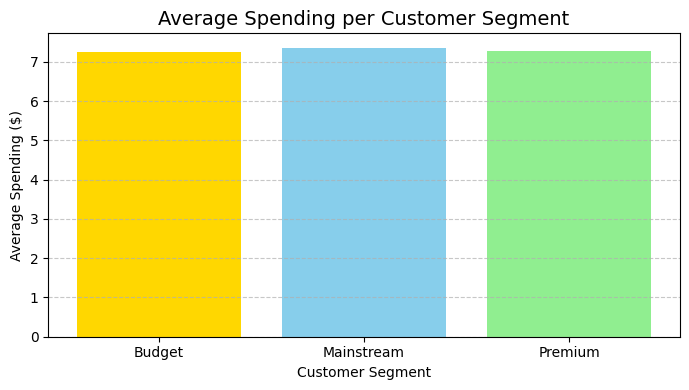

In [ ]:
#
plt.figure(figsize=(7,4))
plt.bar(segment_spending['PREMIUM_CUSTOMER'], segment_spending['Avg_Spending'], color=['gold', 'skyblue', 'lightgreen'])
plt.title('Average Spending per Customer Segment', fontsize=14)
plt.xlabel('Customer Segment')
plt.ylabel('Average Spending ($)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# calculate the sales revenue from the premium and the lifestage


In [ ]:

revenue_by_group = merged_Data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOTAL_SALES'].sum().reset_index()


In [ ]:
revenue_by_group

,LIFESTAGE,PREMIUM_CUSTOMER,TOTAL_SALES
0,MIDAGE SINGLES/COUPLES,Budget,35514.80
1,MIDAGE SINGLES/COUPLES,Mainstream,90803.85
2,MIDAGE SINGLES/COUPLES,Premium,58432.65
3,NEW FAMILIES,Budget,21928.45
4,NEW FAMILIES,Mainstream,17013.90
5,NEW FAMILIES,Premium,11491.10
6,OLDER FAMILIES,Budget,168363.25
7,OLDER FAMILIES,Mainstream,103445.55
8,OLDER FAMILIES,Premium,81958.40
9,OLDER SINGLES/COUPLES,Budget,136769.80


In [ ]:
merged_Data.columns

Index(['DATE', 'STORE_NUMBER', 'CARD_NUMBER', 'TAX_ID', 'PRODUCT_NUMBER',
       'PRODUCT_NAME', 'QUANTITY', 'TOTAL_SALES', 'PACK_SIZE', 'BRAND',
       'LIFESTAGE', 'PREMIUM_CUSTOMER'],
      dtype='object')

# calculate average Transaction value and Quantity per purchase

In [ ]:

summary = (
    merged_Data.groupby('PREMIUM_CUSTOMER')
    .agg(
        Avg_Transaction_Value=('TOTAL_SALES', 'mean'),
        Avg_Quantity_Per_Purchase=('QUANTITY', 'mean'),
        Num_Transactions=('CARD_NUMBER', 'nunique')
    )
    .reset_index()
)

print("✅ Average transaction value and average quantity per purchase by customer group:")
print(summary)

✅ Average transaction value and average quantity per purchase by customer group:
  PREMIUM_CUSTOMER  Avg_Transaction_Value  Avg_Quantity_Per_Purchase  \
0           Budget               7.258838                   1.909658   
1       Mainstream               7.361106                   1.901841   
2          Premium               7.281575                   1.912168   

   Num_Transactions  
0             24470  
1             29245  
2             18922  


# cheacking for product preference by demograhy

In [ ]:

brand_pref = (
    merged_Data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER', 'BRAND'])
           .agg(Total_Sales=('TOTAL_SALES', 'sum'),
                Quantity=('QUANTITY', 'sum'))
           .reset_index()
)


brand_pref = brand_pref.sort_values(['LIFESTAGE', 'PREMIUM_CUSTOMER', 'Total_Sales'], ascending=[True, True, False])

print("Top brand preferences by demographic group:")
print(brand_pref.head(10))

Top brand preferences by demographic group:
                 LIFESTAGE PREMIUM_CUSTOMER      BRAND  Total_Sales  Quantity
9   MIDAGE SINGLES/COUPLES           Budget     KETTLE       6736.2      1365
5   MIDAGE SINGLES/COUPLES           Budget     DORITO       4553.6      1023
14  MIDAGE SINGLES/COUPLES           Budget     SMITHS       4251.3      1194
12  MIDAGE SINGLES/COUPLES           Budget   PRINGLES       3159.8       854
8   MIDAGE SINGLES/COUPLES           Budget  INFUZIONS       1957.8       534
13  MIDAGE SINGLES/COUPLES           Budget        RED       1909.2       672
16  MIDAGE SINGLES/COUPLES           Budget      THINS       1673.1       507
18  MIDAGE SINGLES/COUPLES           Budget   TWISTIES       1505.4       333
17  MIDAGE SINGLES/COUPLES           Budget   TOSTITOS       1403.6       319
11  MIDAGE SINGLES/COUPLES           Budget        OLD       1392.3       273


In [ ]:
merged_Data.columns

Index(['DATE', 'STORE_NUMBER', 'CARD_NUMBER', 'TAX_ID', 'PRODUCT_NUMBER',
       'PRODUCT_NAME', 'QUANTITY', 'TOTAL_SALES', 'PACK_SIZE', 'BRAND',
       'LIFESTAGE', 'PREMIUM_CUSTOMER'],
      dtype='object')

# average time between customer per purchase segment





In [ ]:


df = merged_Data.sort_values(by=['CARD_NUMBER', 'DATE'])

df['Days_Between_Purchases'] = df.groupby('CARD_NUMBER')['DATE'].diff().dt.days

avg_gap_per_customer = (
    df.groupby('CARD_NUMBER')['Days_Between_Purchases']
      .mean()
      .reset_index()
)

df_latest_segment = df.groupby('CARD_NUMBER')['PREMIUM_CUSTOMER'].last().reset_index()
avg_gap_per_customer = avg_gap_per_customer.merge(df_latest_segment, on='CARD_NUMBER')

avg_gap_per_segment = (
    avg_gap_per_customer.groupby('PREMIUM_CUSTOMER')['Days_Between_Purchases']
      .mean()
      .reset_index()
      .rename(columns={'Days_Between_Purchases': 'Avg_Days_Between_Purchases'})
)

print("✅ Average time between purchases per customer:")
print(avg_gap_per_customer)

print("\n✅ Average time between purchases per customer segment:")
print(avg_gap_per_segment)

✅ Average time between purchases per customer:
       CARD_NUMBER  Days_Between_Purchases PREMIUM_CUSTOMER
0             1000                     NaN          Premium
1             1002                     NaN       Mainstream
2             1003                     1.0           Budget
3             1004                     NaN       Mainstream
4             1005                     NaN       Mainstream
...            ...                     ...              ...
72632      2370651                     NaN       Mainstream
72633      2370701                     NaN       Mainstream
72634      2370751                     NaN          Premium
72635      2370961                     3.0           Budget
72636      2373711                     NaN       Mainstream

[72637 rows x 3 columns]

✅ Average time between purchases per customer segment:
  PREMIUM_CUSTOMER  Avg_Days_Between_Purchases
0           Budget                   75.285871
1       Mainstream                   78.898725
2         

CHEACK FOR CUSTOMER PURCHASE FREQUENCY

In [ ]:
merged_Data.columns

Index(['DATE', 'STORE_NUMBER', 'CARD_NUMBER', 'TAX_ID', 'PRODUCT_NUMBER',
       'PRODUCT_NAME', 'QUANTITY', 'TOTAL_SALES', 'PACK_SIZE', 'BRAND',
       'LIFESTAGE', 'PREMIUM_CUSTOMER'],
      dtype='object')

# check for purchase frequency per customer

In [ ]:

purchase_freq = (
    merged_Data.groupby(['PREMIUM_CUSTOMER', 'CARD_NUMBER'])['TAX_ID']
    .nunique()
    .reset_index(name='Purchase_Count')
)

In [ ]:
purchase_freq.head(20)

,PREMIUM_CUSTOMER,CARD_NUMBER,Purchase_Count
0,Budget,1003,2
1,Budget,1007,2
2,Budget,1013,2
3,Budget,1022,1
4,Budget,1025,1
5,Budget,1028,1
6,Budget,1043,1
7,Budget,1046,1
8,Budget,1050,1
9,Budget,1051,1


# check for customers with high loyalty to our product

In [ ]:

loyalty_summary = (
    purchase_freq.groupby('PREMIUM_CUSTOMER')
    .agg(
        Avg_Purchase_Frequency=('Purchase_Count', 'mean'),
        Median_Purchase_Frequency=('Purchase_Count', 'median'),
        Repeat_Purchase_Rate=('Purchase_Count', lambda x: (x > 1).mean())
    )
    .reset_index()
)

print("✅ Customer Loyalty Metrics by Segment:")
print(loyalty_summary)

✅ Customer Loyalty Metrics by Segment:
  PREMIUM_CUSTOMER  Avg_Purchase_Frequency  Median_Purchase_Frequency  \
0           Budget                3.780629                        3.0   
1       Mainstream                3.466678                        3.0   
2          Premium                3.658916                        3.0   

   Repeat_Purchase_Rate  
0              0.743441  
1              0.729697  
2              0.739880  


customers most valuable based on

In [ ]:

rfm = (
    merged_Data.groupby('CARD_NUMBER')
    .agg(
        Recency=('DATE', lambda x: (pd.to_datetime('today') - x.max()).days),
        Frequency=('TAX_ID', 'nunique'),
        Monetary=('TOTAL_SALES', 'sum')
    )
    .reset_index()
)

In [ ]:
rfm

,CARD_NUMBER,Recency,Frequency,Monetary
0,1000,2570,1,6.0
1,1002,2601,1,2.7
2,1003,2428,2,6.6
3,1004,2554,1,1.9
4,1005,2498,1,2.8
...,...,...,...,...
72632,2370651,2645,1,13.0
72633,2370701,2518,1,7.2
72634,2370751,2586,1,9.2
72635,2370961,2560,2,18.6


# most valuable customers in the dataset by their card number

In [ ]:

rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=[5,4,3,2,1])
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1,2,3,4,5])
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 5, labels=[1,2,3,4,5])

# --- 5️⃣ Combine into overall RFM score ---
rfm['RFM_Score'] = rfm['R_Score'].astype(int) + rfm['F_Score'].astype(int) + rfm['M_Score'].astype(int)

# --- 6️⃣ Rank customers based on total RFM score ---
rfm = rfm.sort_values('RFM_Score', ascending=False)

print("✅ RFM Table (Top 10 most valuable customers):")
print(rfm.head(10))

✅ RFM Table (Top 10 most valuable customers):
       CARD_NUMBER  Recency  Frequency  Monetary R_Score F_Score M_Score  \
44715       168032     2324         11      80.0       5       5       5   
44707       168024     2335          7      56.9       5       5       5   
55359       208216     2319          7      54.6       5       5       5   
55381       209006     2315         10      62.4       5       5       5   
44727       168044     2322          7      51.0       5       5       5   
44724       168041     2315         10      73.2       5       5       5   
44721       168038     2316          8      55.8       5       5       5   
55403       209028     2330          8      51.0       5       5       5   
55397       209022     2325          8      51.5       5       5       5   
55395       209020     2327          8      48.4       5       5       5   

       RFM_Score  
44715         15  
44707         15  
55359         15  
55381         15  
44727         15  
447

# calculate average RFM metric by lifestage and premium customer

In [ ]:

merged_Data_with_rfm = pd.merge(merged_Data, rfm[['CARD_NUMBER', 'Recency', 'Frequency', 'Monetary', 'RFM_Score']], on='CARD_NUMBER', how='left')

rfm_summary = (
    merged_Data_with_rfm.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])
    .agg(
        Avg_Recency=('Recency', 'mean'),
        Avg_Frequency=('Frequency', 'mean'),
        Avg_Monetary=('Monetary', 'mean'),
        Avg_RFM_Score=('RFM_Score', 'mean'),
        Num_Customers=('CARD_NUMBER', 'nunique')
    )
    .reset_index()
    .sort_values('Avg_RFM_Score', ascending=False)
)

print("✅ Average RFM metrics by LifeStage and Customer Type:")
print(rfm_summary.head(10))

✅ Average RFM metrics by LifeStage and Customer Type:
                 LIFESTAGE PREMIUM_CUSTOMER  Avg_Recency  Avg_Frequency  \
7           OLDER FAMILIES       Mainstream  2369.468618       7.153889   
6           OLDER FAMILIES           Budget  2369.006649       7.076425   
8           OLDER FAMILIES          Premium  2370.160114       7.009024   
17          YOUNG FAMILIES          Premium  2368.736833       6.923895   
15          YOUNG FAMILIES           Budget  2370.591936       6.935258   
16          YOUNG FAMILIES       Mainstream  2373.004106       6.853103   
11   OLDER SINGLES/COUPLES          Premium  2384.642370       5.164592   
9    OLDER SINGLES/COUPLES           Budget  2385.107894       5.157223   
10   OLDER SINGLES/COUPLES       Mainstream  2384.576428       5.142701   
1   MIDAGE SINGLES/COUPLES       Mainstream  2387.674330       5.139380   

    Avg_Monetary  Avg_RFM_Score  Num_Customers  
7      52.383217      12.652626           2831  
6      52.014648      

In [ ]:
merged_Data.columns

Index(['DATE', 'STORE_NUMBER', 'CARD_NUMBER', 'TAX_ID', 'PRODUCT_NUMBER',
       'PRODUCT_NAME', 'QUANTITY', 'TOTAL_SALES', 'PACK_SIZE', 'BRAND',
       'LIFESTAGE', 'PREMIUM_CUSTOMER'],
      dtype='object')

average sales per store

In [ ]:
# --- 1️⃣ Calculate average sales per store ---
store_avg_sales = (
    merged_Data.groupby('STORE_NUMBER')['TOTAL_SALES']
    .mean()
    .reset_index()
    .rename(columns={'TOTAL_SALES': 'Average_Sales'})
)

# --- 2️⃣ Find highest and lowest ---
highest_store = store_avg_sales.loc[store_avg_sales['Average_Sales'].idxmax()]
lowest_store = store_avg_sales.loc[store_avg_sales['Average_Sales'].idxmin()]

print("🏆 Store with Highest Average Sales:")
print(highest_store)
print("\n⬇️ Store with Lowest Average Sales:")
print(lowest_store)

🏆 Store with Highest Average Sales:
STORE_NUMBER     226.000000
Average_Sales      9.349876
Name: 225, dtype: float64

⬇️ Store with Lowest Average Sales:
STORE_NUMBER     211.0
Average_Sales      2.6
Name: 210, dtype: float64


Agregate store performance

In [ ]:

store_performance = (
    merged_Data.groupby('STORE_NUMBER')['TOTAL_SALES']
    .agg(['mean', 'sum'])
    .mean()
    .reset_index()
    .rename(columns={'Total_Sales': 'Avg_Sales'})
)

count number of unique customer per store

In [ ]:

store_segment = (
    merged_Data.groupby(['STORE_NUMBER', 'PREMIUM_CUSTOMER'])['CARD_NUMBER']
    .nunique()
    .reset_index()
    .rename(columns={'CARD_NUMBER': 'Unique_Customers'})
)

In [ ]:
store_segment

,STORE_NUMBER,PREMIUM_CUSTOMER,Unique_Customers
0,1,Budget,118
1,1,Mainstream,144
2,1,Premium,83
3,2,Budget,111
4,2,Mainstream,125
...,...,...,...
797,271,Mainstream,101
798,271,Premium,68
799,272,Budget,88
800,272,Mainstream,129


calculate percentage of each customer

In [ ]:

customer_type_percent = (
    store_segment.groupby('STORE_NUMBER')['Unique_Customers']
    .apply(lambda x: x / x.sum() * 100)
)

store_segment['Customer_Type_Percent'] = customer_type_percent.reset_index(level=0, drop=True)

# pivot for easy comparison

In [ ]:
# --- 3️⃣ Pivot for easy comparison ---
store_segment_pivot = store_segment.pivot(
    index='STORE_NUMBER', columns='PREMIUM_CUSTOMER', values='Customer_Type_Percent'
).fillna(0).reset_index()

# --- 4️⃣ Identify top stores for Premium and Budget customers ---
top_premium = store_segment_pivot.nlargest(5, 'Premium')[['STORE_NUMBER', 'Premium']]
top_budget = store_segment_pivot.nlargest(5, 'Budget')[['STORE_NUMBER', 'Budget']]

print("🏆 Top 5 Stores with Highest % of Premium Customers:")
print(top_premium)
print("\n💸 Top 5 Stores with Highest % of Budget Customers:")
print(top_budget)

🏆 Top 5 Stores with Highest % of Premium Customers:
PREMIUM_CUSTOMER  STORE_NUMBER     Premium
251                        252  100.000000
10                          11   50.000000
51                          52   42.028986
191                        192   39.705882
43                          44   36.363636

💸 Top 5 Stores with Highest % of Budget Customers:
PREMIUM_CUSTOMER  STORE_NUMBER      Budget
210                        211  100.000000
84                          85   66.666667
192                        193   66.666667
10                          11   50.000000
30                          31   50.000000


# cheacking for percentage of contribution to sales from various pack size

In [ ]:

merged_Data['Pack_Size_Num'] = (
    merged_Data['PACK_SIZE']
    .astype(str)
    .str.extract(r'(\d+\.?\d*)')   # extract numbers
    .astype(float)
)

# --- 2️⃣ Aggregate total sales by pack size ---
pack_sales = (
    merged_Data.groupby('Pack_Size_Num')['TOTAL_SALES']
    .sum()
    .reset_index()
    .sort_values('Pack_Size_Num')
)

# --- 3️⃣ Calculate percentage share by pack size ---
pack_sales['Sales_Percent'] = (
    pack_sales['TOTAL_SALES'] / pack_sales['TOTAL_SALES'].sum() * 100
)

print("📦 Total and percentage sales by pack size:")
print(pack_sales)

📦 Total and percentage sales by pack size:
    Pack_Size_Num  TOTAL_SALES  Sales_Percent
0            70.0       6852.0       0.354217
1            90.0       9676.4       0.500225
2           110.0     162765.4       8.414219
3           125.0       5733.0       0.296370
4           134.0     177655.5       9.183968
5           135.0      26090.4       1.348753
6           150.0     304288.5      15.730308
7           160.0      10647.6       0.550432
8           165.0     101360.6       5.239874
9           170.0     146673.0       7.582316
10          175.0     485431.4      25.094559
11          180.0       8568.4       0.442947
12          190.0      14412.9       0.745080
13          200.0      16007.5       0.827514
14          210.0      43048.8       2.225424
15          220.0       6831.0       0.353131
16          250.0      26096.7       1.349079
17          270.0      55425.4       2.865237
18          300.0     113330.6       5.858668
19          330.0     136794.3       

# total sales by pack size

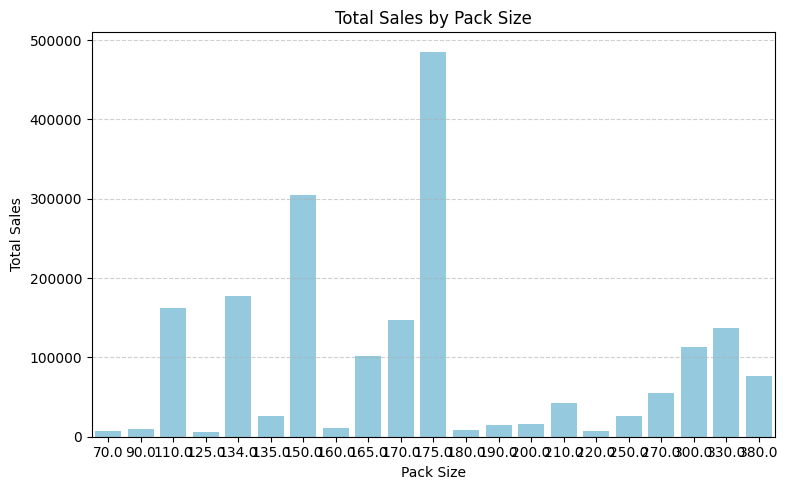

In [ ]:

plt.figure(figsize=(8,5))
sns.barplot(data=pack_sales, x='Pack_Size_Num', y='TOTAL_SALES', color='skyblue')
plt.title('Total Sales by Pack Size')
plt.xlabel('Pack Size')
plt.ylabel('Total Sales')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [ ]:
# --- 1️⃣ Ensure you have unit price ---
if 'Unit_Price' not in merged_Data.columns:
    merged_Data['Unit_Price'] = merged_Data['TOTAL_SALES'] / merged_Data['QUANTITY']

# --- 2️⃣ Calculate average item price by customer type ---
avg_price_by_type = (
    merged_Data.groupby('PREMIUM_CUSTOMER')['Unit_Price']
    .mean()
    .reset_index()
    .sort_values('Unit_Price', ascending=False)
)

print("💰 Average price per item by customer type:")
print(avg_price_by_type)

💰 Average price per item by customer type:
  PREMIUM_CUSTOMER  Unit_Price
1       Mainstream    3.867268
2          Premium    3.803964
0           Budget    3.793403


# calculate value per unit

In [ ]:

merged_Data_with_rfm['Value_per_Unit'] = merged_Data_with_rfm['TOTAL_SALES'] / merged_Data_with_rfm['QUANTITY']


product_value = (
    merged_Data_with_rfm.groupby(['PRODUCT_NAME', 'BRAND'])['Value_per_Unit']
    .mean()
    .reset_index()
    .sort_values('Value_per_Unit', ascending=False)
)
print("🏆 Top 10 Products: Best Value per Dollar Spent")
print(product_value.head(10))
print("\n⚠️ Bottom 10 Products: Lowest Value per Dollar Spent")
print(product_value.tail(10))

🏆 Top 10 Products: Best Value per Dollar Spent
                                PRODUCT_NAME     BRAND  Value_per_Unit
11          Dorito Corn Chp     Supreme 380g    DORITO        6.366327
86    Smiths Crnkle Chip  Orgnl Big Bag 380g    SMITHS        5.900000
12          Doritos Cheese      Supreme 330g    DORITO        5.700000
76         Smiths Crinkle      Original 330g    SMITHS        5.700000
77  Smiths Crinkle Chips Salt & Vinegar 330g    SMITHS        5.700000
6                       Cheezels Cheese 330g  CHEEZELS        5.700000
32          Kettle Honey Soy    Chicken 175g    KETTLE        5.400000
35      Kettle Sea Salt     And Vinegar 175g    KETTLE        5.400000
33    Kettle Mozzarella   Basil & Pesto 175g    KETTLE        5.400000
34                      Kettle Original 175g    KETTLE        5.399145

⚠️ Bottom 10 Products: Lowest Value per Dollar Spent
                                 PRODUCT_NAME       BRAND  Value_per_Unit
107            WW Original Corn    Chips 200

In [ ]:
  merged_Data_with_rfm.head()

,DATE,STORE_NUMBER,CARD_NUMBER,TAX_ID,PRODUCT_NUMBER,PRODUCT_NAME,QUANTITY,TOTAL_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,Recency,Frequency,Monetary,RFM_Score,Value_per_Unit
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175.0,NATURAL,YOUNG SINGLES/COUPLES,Premium,2570,1,6.0,3,3.00
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175.0,CCS,MIDAGE SINGLES/COUPLES,Budget,2361,3,12.2,9,2.10
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170.0,SMITHS,MIDAGE SINGLES/COUPLES,Budget,2355,1,2.9,6,1.45
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175.0,SMITHS,MIDAGE SINGLES/COUPLES,Budget,2631,1,15.0,4,3.00
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150.0,KETTLE,MIDAGE SINGLES/COUPLES,Budget,2630,1,13.8,4,4.60


In [ ]:
merged_Data_with_rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264835 entries, 0 to 264834
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              264835 non-null  datetime64[ns]
 1   STORE_NUMBER      264835 non-null  int64         
 2   CARD_NUMBER       264835 non-null  int64         
 3   TAX_ID            264835 non-null  int64         
 4   PRODUCT_NUMBER    264835 non-null  int64         
 5   PRODUCT_NAME      264835 non-null  object        
 6   QUANTITY          264835 non-null  int64         
 7   TOTAL_SALES       264835 non-null  float64       
 8   PACK_SIZE         264835 non-null  float64       
 9   BRAND             264835 non-null  object        
 10  LIFESTAGE         264835 non-null  object        
 11  PREMIUM_CUSTOMER  264835 non-null  object        
 12  Recency           264835 non-null  int64         
 13  Frequency         264835 non-null  int64         
 14  Mone

# check for column with outlier

In [ ]:

Q1 = merged_Data_with_rfm["QUANTITY"].quantile(0.25)
Q3 = merged_Data_with_rfm["QUANTITY"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = merged_Data_with_rfm[(merged_Data_with_rfm['QUANTITY']
<lower_bound) | (merged_Data_with_rfm['QUANTITY'] > upper_bound)]
outlier_merged_Data = merged_Data_with_rfm[merged_Data_with_rfm["QUANTITY"] ==200]
print("TRANSACTION WITH OUTLIERS:")
print("Outliers in 'QUANTITY':", outliers)

TRANSACTION WITH OUTLIERS:
Outliers in 'QUANTITY':              DATE  STORE_NUMBER  CARD_NUMBER  TAX_ID  PRODUCT_NUMBER  \
1      2019-05-14             1         1307     348              66   
3      2018-08-17             2         2373     974              69   
4      2018-08-18             2         2426    1038             108   
5      2019-05-19             4         4074    2982              57   
6      2019-05-16             4         4149    3333              16   
...           ...           ...          ...     ...             ...   
264753 2018-10-07           268       268396  264841               8   
264754 2018-10-22           268       268463  264916              87   
264755 2019-04-28           268       268491  264947              56   
264823 2019-03-13           272       272193  269906               9   
264831 2018-08-13           272       272358  270154              74   

                                    PRODUCT_NAME  QUANTITY  TOTAL_SALES  \
1        

In [ ]:
merged_Data_with_rfm.dtypes

,0
DATE,datetime64[ns]
STORE_NUMBER,int64
CARD_NUMBER,int64
TAX_ID,int64
PRODUCT_NUMBER,int64
PRODUCT_NAME,object
QUANTITY,int64
TOTAL_SALES,float64
PACK_SIZE,float64
BRAND,object


In [ ]:
# Extract numeric columns
numeric_merged_Data_with_rfm = df.select_dtypes(include=['int', 'float'])


In [ ]:
merged_Data_with_rfm.head()

,DATE,STORE_NUMBER,CARD_NUMBER,TAX_ID,PRODUCT_NUMBER,PRODUCT_NAME,QUANTITY,TOTAL_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,Recency,Frequency,Monetary,RFM_Score,Value_per_Unit
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175.0,NATURAL,YOUNG SINGLES/COUPLES,Premium,2570,1,6.0,3,3.00
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175.0,CCS,MIDAGE SINGLES/COUPLES,Budget,2361,3,12.2,9,2.10
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170.0,SMITHS,MIDAGE SINGLES/COUPLES,Budget,2355,1,2.9,6,1.45
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175.0,SMITHS,MIDAGE SINGLES/COUPLES,Budget,2631,1,15.0,4,3.00
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150.0,KETTLE,MIDAGE SINGLES/COUPLES,Budget,2630,1,13.8,4,4.60
